In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [158]:
data = pd.read_csv(r"unnati_phase1_data_revised.csv")

In [4]:
data.head()

,Alert,Date,Time,Lat,Long,Vehicle,Speed
0,cas_ldw,2022-06-01,05:36:36,12.887403,80.083412,2846,48
1,cas_ldw,2022-06-01,05:36:47,12.892586,80.085794,2846,58
2,cas_ldw,2022-06-01,05:37:04,12.894932,80.087564,2846,57
3,cas_ldw,2022-06-01,05:37:31,12.898267,80.090062,2846,49
4,cas_ldw,2022-06-01,05:38:08,12.901594,80.092538,2846,58


In [5]:
data.shape

(21325, 7)

In [6]:
data.isna().sum()

Alert      0
Date       0
Time       0
Lat        0
Long       0
Vehicle    0
Speed      0
dtype: int64

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

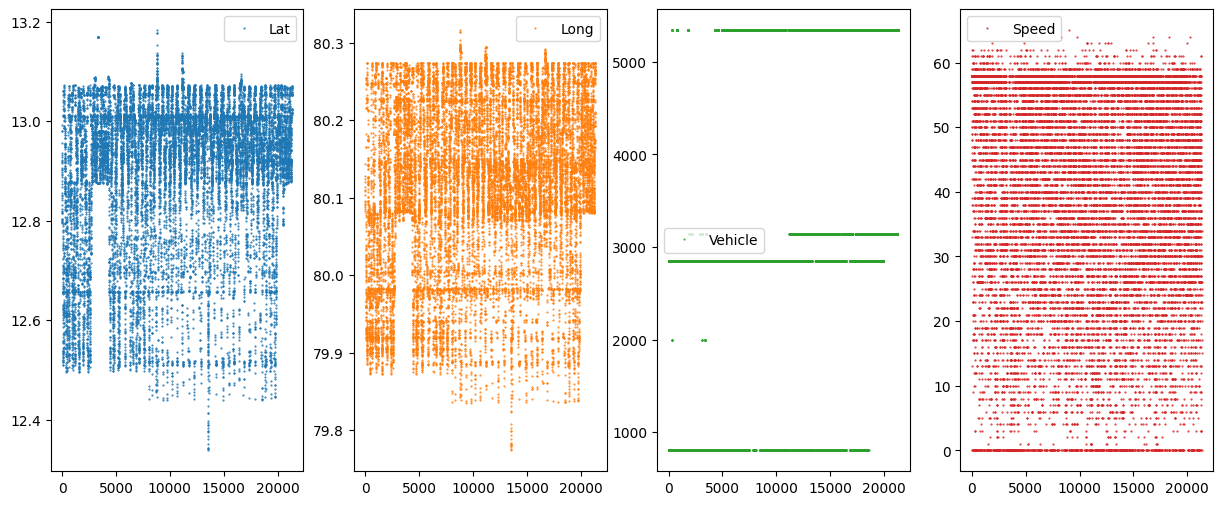

In [24]:
data.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 6), markersize=1)

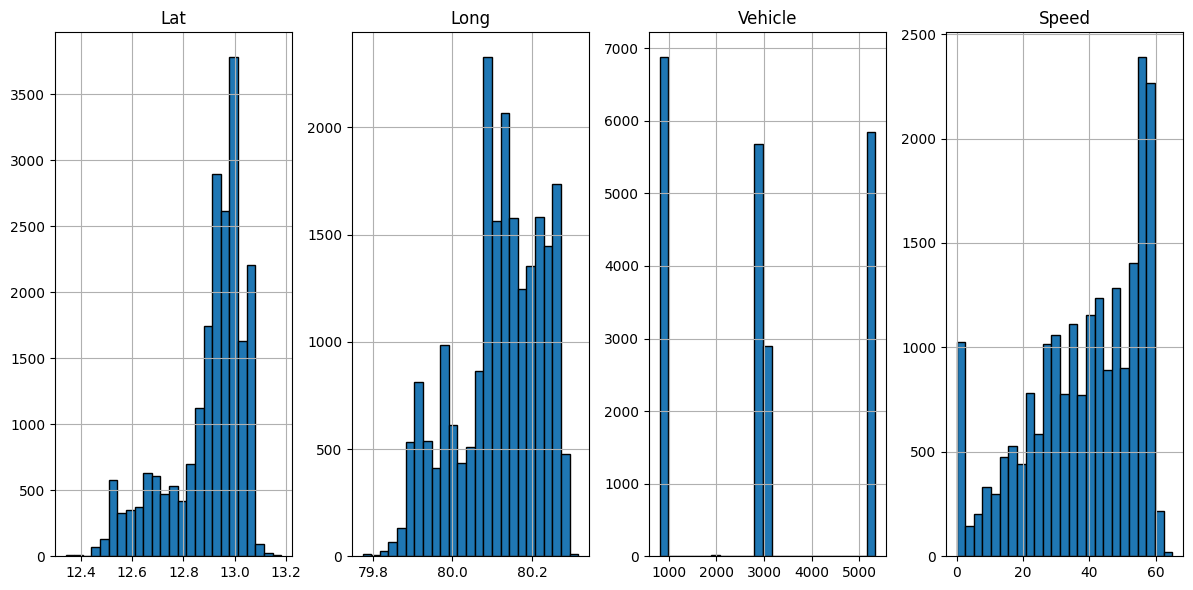

In [25]:
data.hist(bins=25, figsize=(15, 6), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

In [14]:
data['Date'].nunique()

51

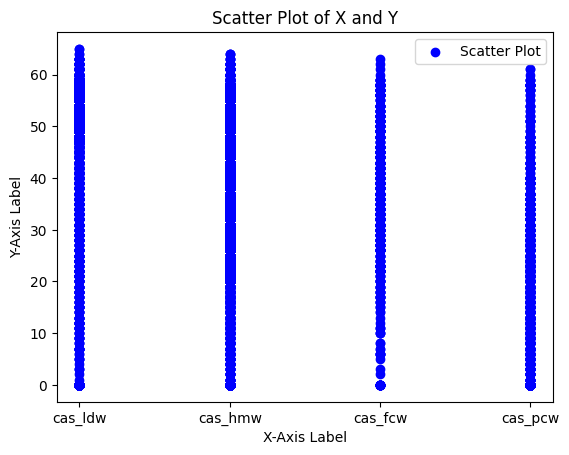

In [159]:
x = data['Alert']
y = data['Speed']

# Create a scatter plot
plt.scatter(x, y, label='Scatter Plot', color='blue')

# Add labels and a title
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Scatter Plot of X and Y')

# Show a legend (if needed)
plt.legend()

# Show the plot
plt.show()


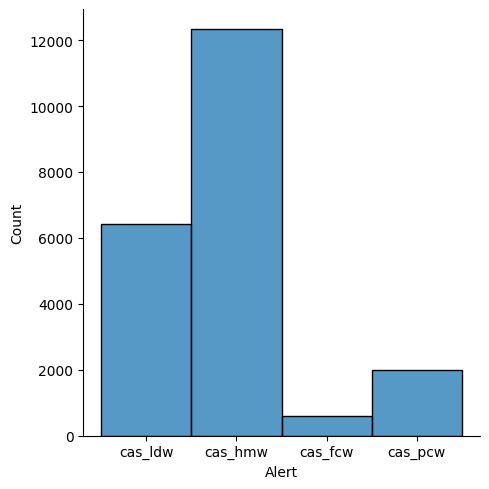

In [5]:
sns.displot(data['Alert'])

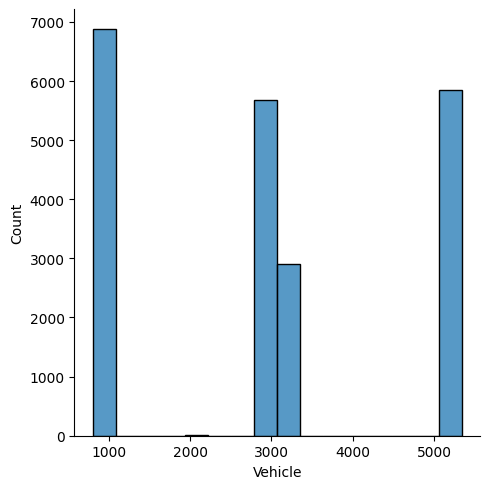

In [6]:
sns.displot(data['Vehicle'])

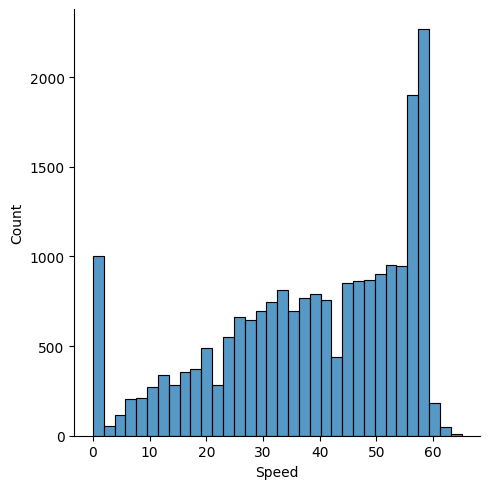

In [18]:
sns.displot(data['Speed'])

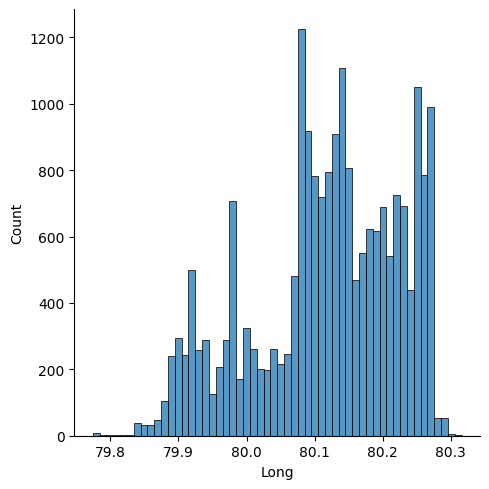

In [19]:
sns.displot(data['Long'])

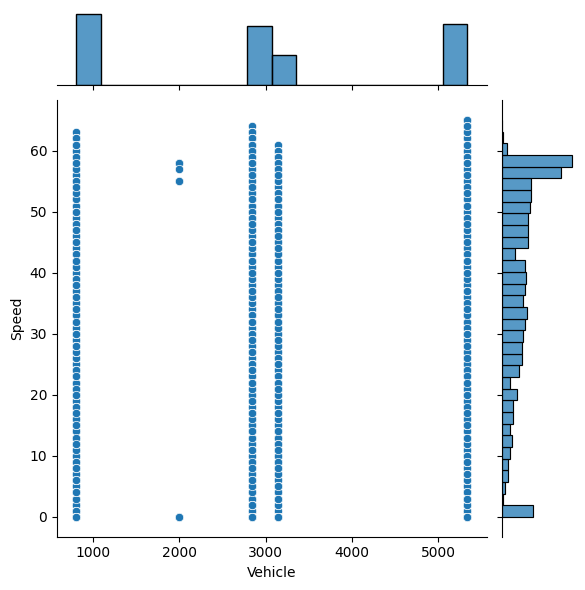

In [29]:
sns.jointplot(x='Vehicle',y='Speed',data=data)

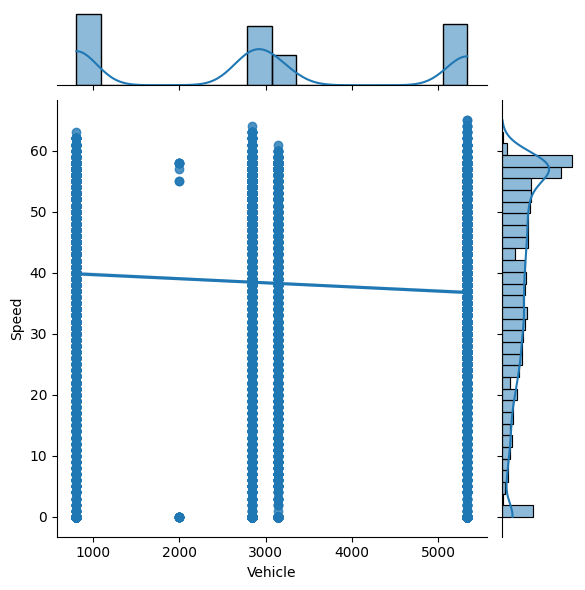

In [30]:
sns.jointplot(x='Vehicle',y='Speed',data=data,kind='reg')

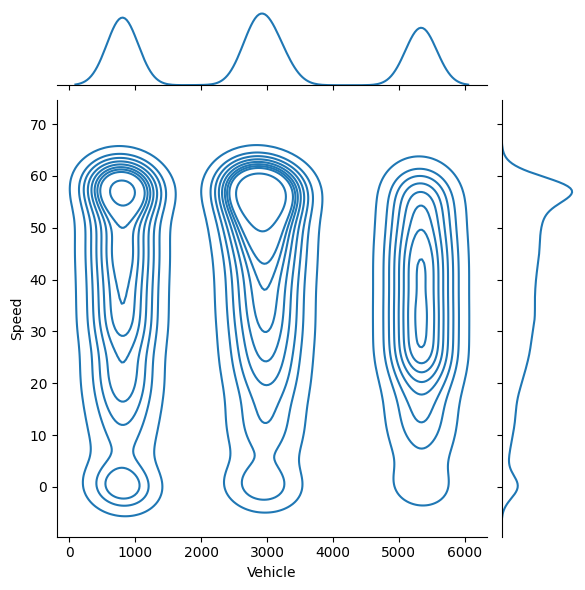

In [31]:
sns.jointplot(x='Vehicle',y='Speed',data=data,kind='kde')

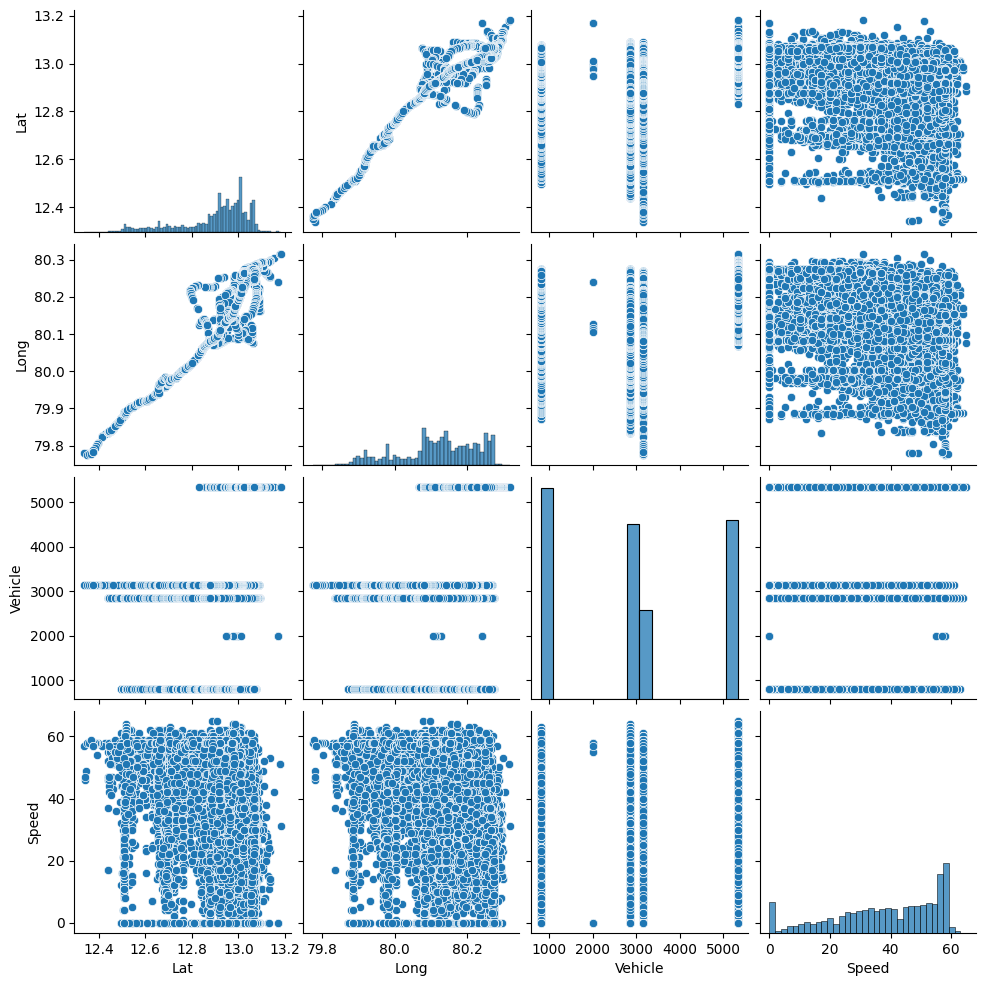

In [32]:
sns.pairplot(data)

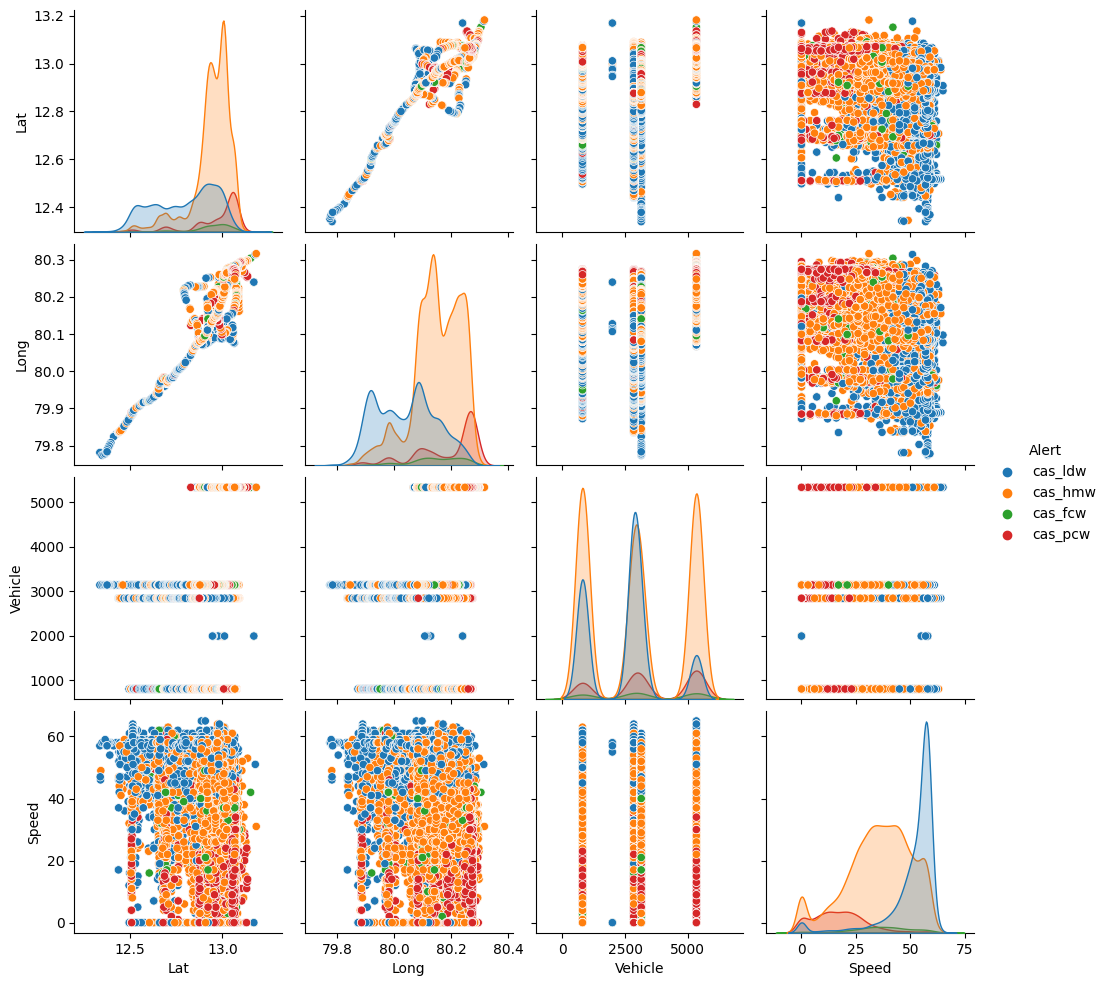

In [33]:
sns.pairplot(data,hue = 'Alert')

In [7]:
!pip install pandas-profiling

                                              0.0/324.4 kB ? eta -:--:--
                                              0.0/324.4 kB ? eta -:--:--
     -                                        10.2/324.4 kB ? eta -:--:--
     -                                        10.2/324.4 kB ? eta -:--:--
     ---                                   30.7/324.4 kB 187.9 kB/s eta 0:00:02
     ---                                   30.7/324.4 kB 187.9 kB/s eta 0:00:02
     -------                               61.4/324.4 kB 233.8 kB/s eta 0:00:02
     ------------                         112.6/324.4 kB 386.4 kB/s eta 0:00:01
     -------------------------            225.3/324.4 kB 689.2 kB/s eta 0:00:01
     -----------------------------------  317.4/324.4 kB 893.0 kB/s eta 0:00:01
     ------------------------------------ 324.4/324.4 kB 875.0 kB/s eta 0:00:00
                                              0.0/357.3 kB ? eta -:--:--
     ------------                             112.6/357.3 kB ? eta -:--:-

In [8]:
from pandas_profiling import ProfileReport

C:\Users\akash\AppData\Roaming\Python\Python39\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\akash\.conda\envs\gpu\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
C:\Users\akash\AppData\Local\Temp\ipykernel_10740\2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to 

In [9]:
profile = ProfileReport(data)
profile.to_file(output_file='data.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Exception ignored in: <function tqdm.__del__ at 0x000002911DCF5820>
Traceback (most recent call last):
  File "C:\Users\akash\.conda\envs\gpu\lib\site-packages\tqdm\std.py", line 1145, in __del__
    self.close()
KeyboardInterrupt: 


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Analysis

In [37]:
import datetime as dt

In [44]:
df=data.copy()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21325 entries, 0 to 21324
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Alert     21325 non-null  object        
 1   Date      21325 non-null  object        
 2   Time      21325 non-null  object        
 3   Lat       21325 non-null  float64       
 4   Long      21325 non-null  float64       
 5   Vehicle   21325 non-null  int64         
 6   Speed     21325 non-null  int64         
 7   DateTime  21325 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [57]:
df.head()

,Alert,Date,Time,Lat,Long,Vehicle,Speed,DateTime
0,cas_ldw,2022-06-01,05:36:36,12.887403,80.083412,2846,48,2022-06-01 05:36:36
1,cas_ldw,2022-06-01,05:36:47,12.892586,80.085794,2846,58,2022-06-01 05:36:47
2,cas_ldw,2022-06-01,05:37:04,12.894932,80.087564,2846,57,2022-06-01 05:37:04
3,cas_ldw,2022-06-01,05:37:31,12.898267,80.090062,2846,49,2022-06-01 05:37:31
4,cas_ldw,2022-06-01,05:38:08,12.901594,80.092538,2846,58,2022-06-01 05:38:08


In [51]:
df['DateTime']=df["Date"]+" "+df["Time"]

In [56]:
df["DateTime"]=pd.to_datetime(df["DateTime"],format='%Y-%m-%d %H:%M:%S')

### Mapping

In [78]:
!pip install geopandas shapely

In [79]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [90]:
geometry = [Point(xy) for xy in zip(data['Long'], data['Lat'])]
gdf = GeoDataFrame(data, geometry = geometry)

(12.338685, 13.182797)

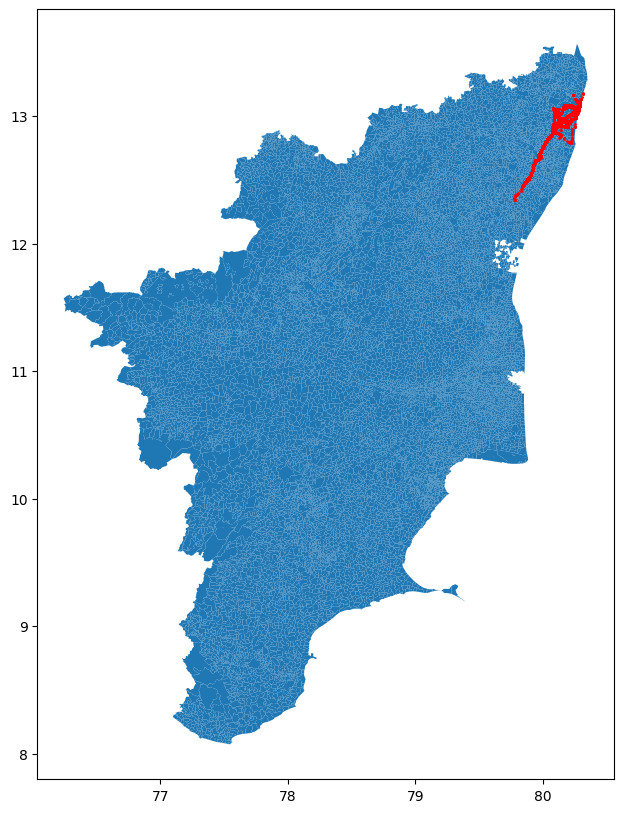

In [108]:
world = gpd.read_file(r'C:\Users\akash\Desktop\nyu-2451-42207-shapefile\nyu_2451_42207.shp')
gdf.plot(ax = world.plot(figsize = (10, 10)), color = 'red', markersize = 1)
minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

In [109]:
gdf.total_bounds

array([79.77412 , 12.338685, 80.316079, 13.182797])

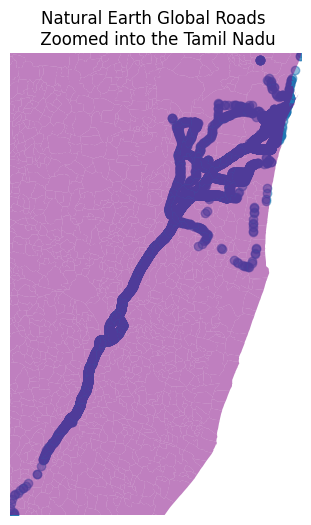

In [110]:
fig, ax = plt.subplots(figsize = (10,6))

xlim = ([gdf.total_bounds[0],  gdf.total_bounds[2]])
ylim = ([gdf.total_bounds[1], gdf.total_bounds[3]])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

gdf.plot(alpha = .5, ax = ax)
world.plot(color='purple', ax=ax, alpha=.5)

ax.set(title='Natural Earth Global Roads \n Zoomed into the Tamil Nadu')
ax.set_axis_off()
plt.show()

In [112]:
!pip install cartopy

                                              0.0/11.2 MB ? eta -:--:--
                                             0.0/11.2 MB 991.0 kB/s eta 0:00:12
                                              0.1/11.2 MB 1.4 MB/s eta 0:00:08
     -                                        0.4/11.2 MB 2.8 MB/s eta 0:00:04
     --                                       0.8/11.2 MB 4.4 MB/s eta 0:00:03
     ------                                   1.7/11.2 MB 7.9 MB/s eta 0:00:02
     ------                                   1.7/11.2 MB 7.9 MB/s eta 0:00:02
     --------                                 2.2/11.2 MB 7.9 MB/s eta 0:00:02
     --------                                 2.4/11.2 MB 6.9 MB/s eta 0:00:02
     ---------                                2.6/11.2 MB 6.7 MB/s eta 0:00:02
     ----------                               3.0/11.2 MB 6.8 MB/s eta 0:00:02
     ----------                               3.0/11.2 MB 6.6 MB/s eta 0:00:02
     -----------                              3.1/11.2 MB 

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\akash\\.conda\\envs\\gpu\\Lib\\site-packages\\matplotlib\\ft2font.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



C:\Users\akash\AppData\Roaming\Python\Python39\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\akash\AppData\Roaming\Python\Python39\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


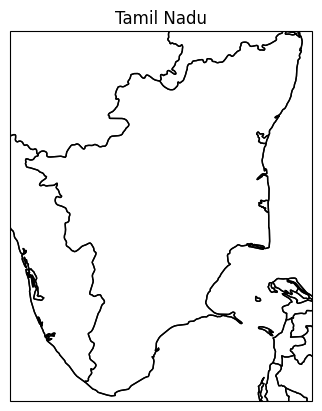

In [116]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Create a map projection for Tamil Nadu using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([76.0, 80.5, 8.0, 13.5])  # Define the latitude and longitude boundaries for Tamil Nadu

# Draw coastlines, state boundaries, and other map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.STATES)

# Add a title to the map
ax.set_title('Tamil Nadu')

# Show the map
plt.show()


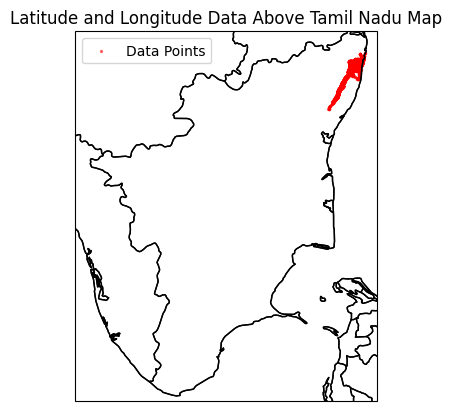

In [117]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd



# Create a map projection for Tamil Nadu using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([76.0, 80.5, 8.0, 13.5])  # Define the latitude and longitude boundaries for Tamil Nadu

# Draw coastlines, state boundaries, and other map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.STATES)

# Plot your latitude and longitude data points on top of the map
plt.scatter(df['Long'], df['Lat'], s=2, alpha=0.5, marker='o', color='red', label='Data Points')

# Add labels, title, and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude and Longitude Data Above Tamil Nadu Map')
plt.legend()

# Show the plot
plt.show()


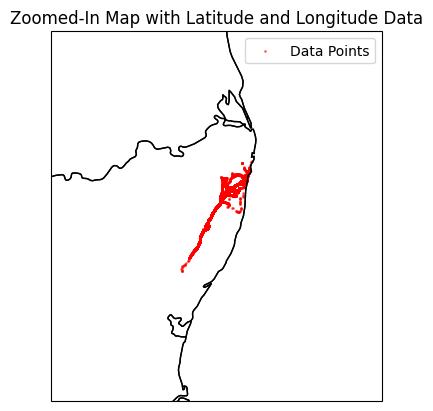

In [124]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd



# Determine the latitude and longitude boundaries based on your data
min_lat = df['Lat'].min()
max_lat = df['Lat'].max()
min_lon = df['Long'].min()
max_lon = df['Long'].max()

# Create a map projection centered around your data
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([min_lon - 1, max_lon + 1, min_lat - 1, max_lat + 1])  # Adjust boundaries for zoom

# Draw coastlines, state boundaries, and other map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.STATES)

# Plot your latitude and longitude data points on top of the map
plt.scatter(df['Long'], df['Lat'], s=1, alpha=0.5, marker='o', color='red', label='Data Points')

# Add labels, title, and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Zoomed-In Map with Latitude and Longitude Data')
plt.legend()

# Show the plot
plt.show()


In [125]:
import seaborn as sns

# Create a heatmap of point density
sns.kdeplot(df['Long'], df['Lat'], cmap='Blues', shade=True, cbar=True)
plt.title('Point Density Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

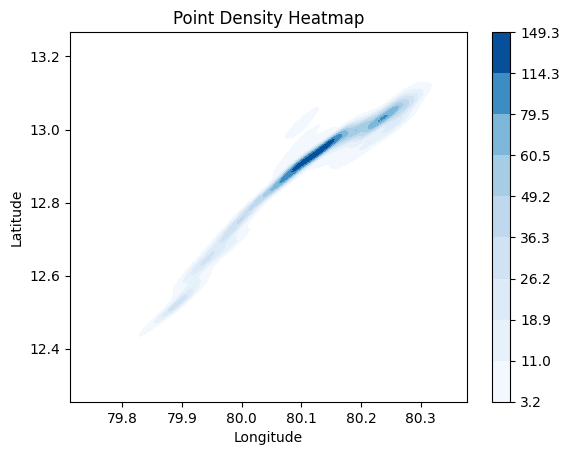

In [127]:
import seaborn as sns

# Create a heatmap of point density
sns.kdeplot(x=df['Long'], y=df['Lat'], cmap='Blues', fill=True, cbar=True)
plt.title('Point Density Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



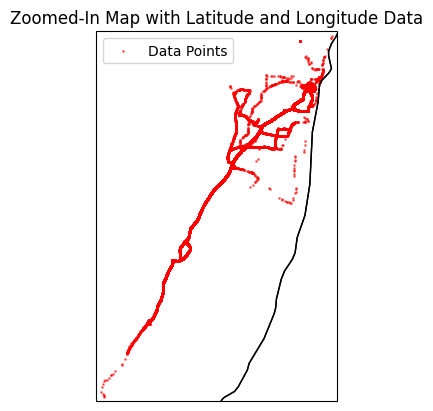

In [131]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd


# Determine the latitude and longitude boundaries based on your data
min_lat = df['Lat'].min()
max_lat = df['Lat'].max()
min_lon = df['Long'].min()
max_lon = df['Long'].max()

# Define a margin (adjust as needed) for a tighter zoom
margin = 0.01  # Example margin of 0.1 degrees

# Create a map projection centered around your data with a tighter zoom
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([min_lon - margin, max_lon + margin, min_lat - margin, max_lat + margin])

# Draw coastlines, state boundaries, and other map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.STATES)

# Plot your latitude and longitude data points on top of the map
plt.scatter(df['Long'], df['Lat'], s=1, alpha=0.5, marker='o', color='red', label='Data Points')

# Add labels, title, and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Zoomed-In Map with Latitude and Longitude Data')
plt.legend()

# Show the plot
plt.show()


In [134]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import cartopy.crs as ccrs

# Load the Tamil Nadu highways shapefile
highways = gpd.read_file(r'C:\Users\akash\Downloads\tamil_nadu_highway.shp')



# Create a function to update the map based on the selected margin
def update_map(margin):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([76.0 - margin, 80.5 + margin, 8.0 - margin, 13.5 + margin])

    # Draw highways from the shapefile
    highways.plot(ax=ax, linewidth=1, color='blue',alpha=0.2)

    # Plot your latitude and longitude data points on top of the map
    plt.scatter(df['Long'], df['Lat'], s=1, alpha=1, marker='o', color='red', label='Data Points')

    # Add labels, title, and legend
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Tamil Nadu Highways with Latitude and Longitude Data (Margin={margin:.2f})')
    plt.legend()

    # Show the plot
    plt.show()

# Create a slider widget to vary the margin
margin_slider = widgets.FloatSlider(value=0.1, min=0.01, max=1.0, step=0.01, description='Margin:')
widgets.interactive(update_map, margin=margin_slider)


interactive(children=(FloatSlider(value=0.1, description='Margin:', max=1.0, min=0.01, step=0.01), Output()), …

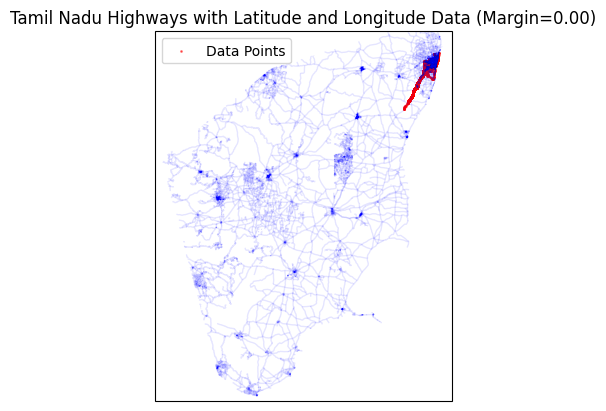

In [137]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs

# Load the Tamil Nadu highways shapefile
highways = gpd.read_file(r'C:\Users\akash\Downloads\tamil_nadu_highway.shp')



# Define your desired margin (adjust as needed)
margin = 0.00001  # Example margin of 0.1 degrees

# Create a map projection centered around Tamil Nadu with the specified margin
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([76.0 - margin, 80.5 + margin, 8.0 - margin, 13.5 + margin])

# Draw highways from the shapefile
highways.plot(ax=ax, linewidth=1, color='blue',alpha=0.1)

# Plot your latitude and longitude data points on top of the map
plt.scatter(df['Long'], df['Lat'], s=1, alpha=0.5, marker='o', color='red', label='Data Points')

# Add labels, title, and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Tamil Nadu Highways with Latitude and Longitude Data (Margin={margin:.2f})')
plt.legend()

# Show the plot
plt.show()


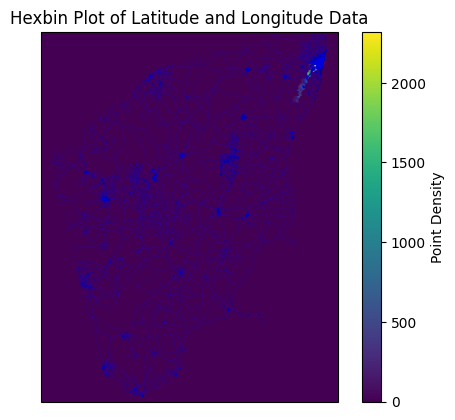

In [141]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs

# Load the Tamil Nadu highways shapefile
highways = gpd.read_file(r'C:\Users\akash\Downloads\tamil_nadu_highway.shp')

# Define the map projection centered around Tamil Nadu
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([76.0, 80.5, 8.0, 13.5])

# Draw highways from the shapefile
highways.plot(ax=ax, linewidth=1, color='blue',alpha=0.1)

# Create a hexbin plot to visualize point density
hb = ax.hexbin(df['Long'], df['Lat'], gridsize=100, cmap='viridis', extent=(76.0, 80.5, 8.0, 13.5))

# Add labels, title, and colorbar
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Plot of Latitude and Longitude Data')
plt.colorbar(hb, label='Point Density')

# Show the plot
plt.show()


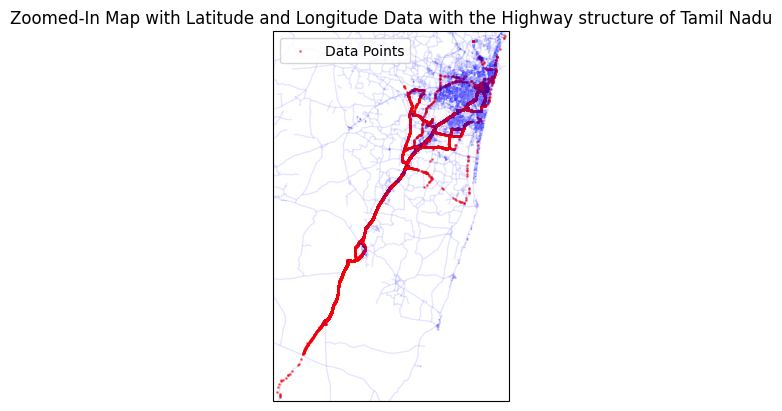

In [144]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs

# Load the Tamil Nadu highways shapefile
highways = gpd.read_file(r'C:\Users\akash\Downloads\tamil_nadu_highway.shp')

# Determine the bounding box for your latitude and longitude data
min_lon = df['Long'].min()
max_lon = df['Long'].max()
min_lat = df['Lat'].min()
max_lat = df['Lat'].max()

# Calculate the margin to add around the bounding box (adjust as needed)
margin = 0.01  # Example margin of 0.01 degrees

# Create a map projection centered around the bounding box with the margin
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([min_lon - margin, max_lon + margin, min_lat - margin, max_lat + margin])

# Draw highways from the shapefile
highways.plot(ax=ax, linewidth=1, color='blue',alpha=0.1)

# Plot your latitude and longitude data points on top of the map
plt.scatter(df['Long'], df['Lat'], s=1, alpha=0.5, marker='o', color='red', label='Data Points')

# Add labels, title, and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Zoomed-In Map with Latitude and Longitude Data with the Highway structure of Tamil Nadu')
plt.legend()

# Show the plot
plt.show()


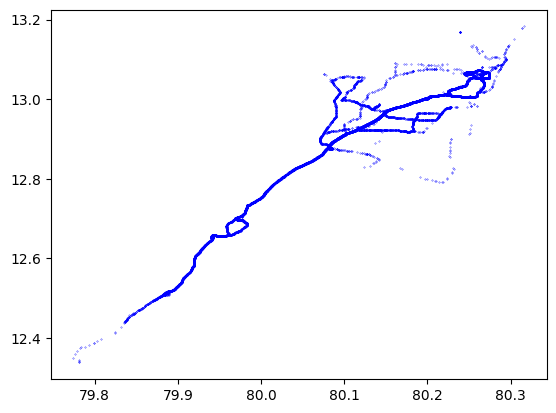

In [147]:
plt.plot(data.Long, data.Lat, 'b.', ms=0.5)

In [152]:


# Specify the column containing the unique values
unique_column = 'Alert'  # Replace with your actual column name

# Group the data by the unique values in the specified column
grouped = df.groupby(unique_column)

# Iterate over groups and create separate CSV files
for group_name, group_data in grouped:
    # Create a new DataFrame for the group
    group_df = pd.DataFrame(group_data)
    
    # Generate a CSV file name based on the unique value
    csv_file_name = f'{group_name}.csv'
    
    # Save the group data to the CSV file
    group_df.to_csv(csv_file_name, index=False)

# Print a message to confirm the process is complete
print("CSV files created for each unique value.")


CSV files created for each unique value.


### Separate plottings
Meanings of each unique value in the alertcolumn:<br>
**FCW**: forward collision warning -improves driver alertness to rear end coliision events
<br>
**PCW**: Pedestrian collision warning - Improves driver alertness to vulnerable road users
<br>
**HMW**: Headway monitoring & Warning - Helps driver main safe distance from vehicle 
<br>
**LDW**: Lane departure warning - Promotes lane discipline (use turn indicator before changing routes)

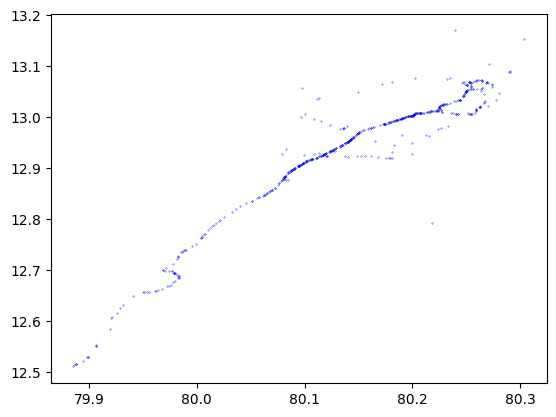

In [190]:
data = pd.read_csv(r"cas_fcw.csv")
plt.plot(data.Long, data.Lat, 'b.', ms=0.5)

In [196]:
data['Speed'].describe()

count    590.000000
mean      36.366102
std       14.121527
min        0.000000
25%       29.000000
50%       37.000000
75%       46.000000
max       63.000000
Name: Speed, dtype: float64

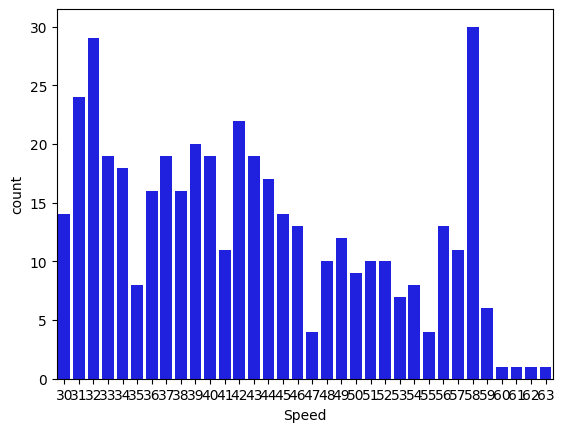

In [198]:
filtered_data = data[data['Speed'] > 29]

# Create a count plot for the filtered data
ax = sns.countplot(data=filtered_data, x='Speed', color='blue')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 [Text(0, 0, '0'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '10'),
  Text(8, 0, '11'),
  Text(9, 0, '12'),
  Text(10, 0, '13'),
  Text(11, 0, '14'),
  Text(12, 0, '15'),
  Text(13, 0, '16'),
  Text(14, 0, '17'),
  Text(15, 0, '18'),
  Text(16, 0, '19'),
  Text(17, 0, '20'),
  Text(18, 0, '21'),
  Text(19, 0, '22'),
  Text(20, 0, '23'),
  Text(21, 0, '24'),
  Text(22, 0, '25'),
  Text(23, 0, '26'),
  Text(24, 0, '27'),
  Text(25, 0, '28'),
  Text(26, 0, '29'),
  Text(27, 0, '30'),
  Text(28, 0, '31'),
  Text(29, 0, '32'),
  Text(30, 0, '33'),
  Text(31, 0, '34'),
  Text(32, 0, '35'),
  Text(33, 0, '36'),
  Text(34, 0, '37'),
  Te

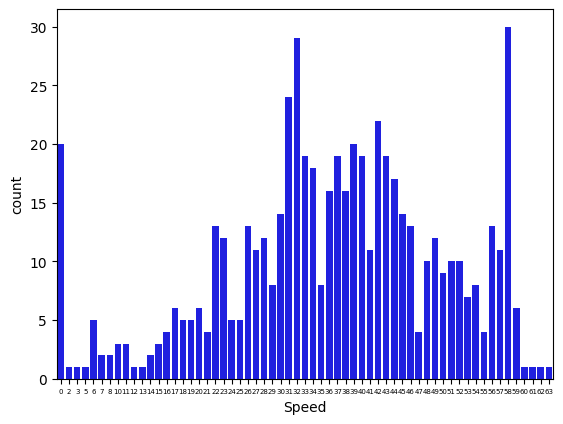

In [183]:
ax = sns.countplot(data=data, x='Speed', color='blue')
plt.xticks(fontsize=5)

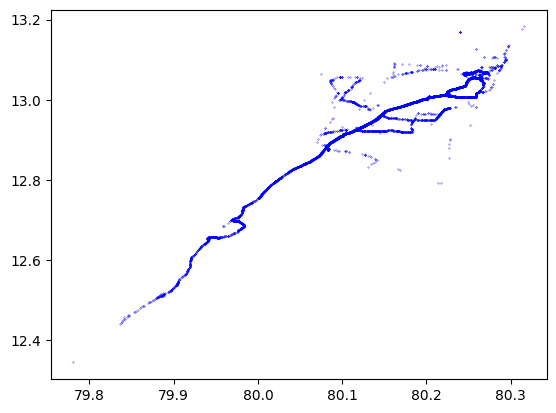

In [184]:
data = pd.read_csv(r"cas_hmw.csv")
plt.plot(data.Long, data.Lat, 'b.', ms=0.5)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0

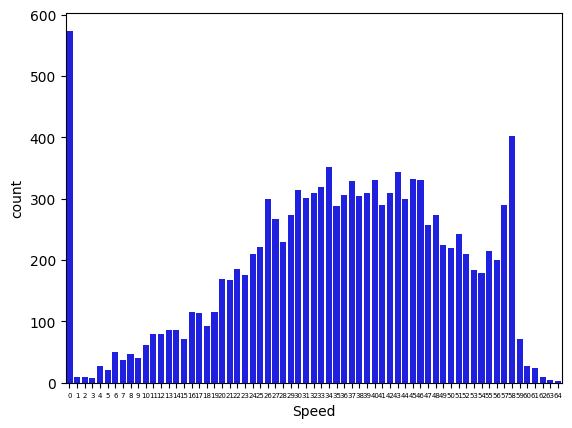

In [185]:
ax = sns.countplot(data=data, x='Speed', color='blue')
plt.xticks(fontsize=5)

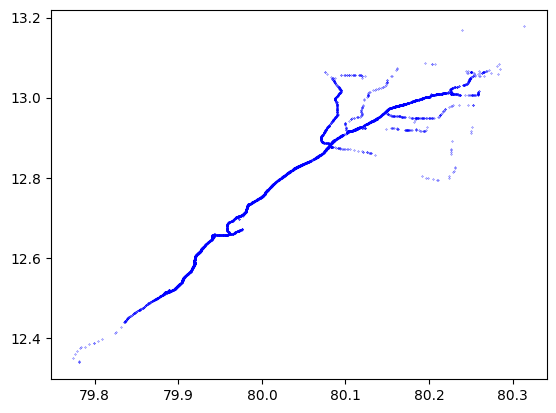

In [186]:
data = pd.read_csv(r"cas_ldw.csv")
plt.plot(data.Long, data.Lat, 'b.', ms=0.5)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(3

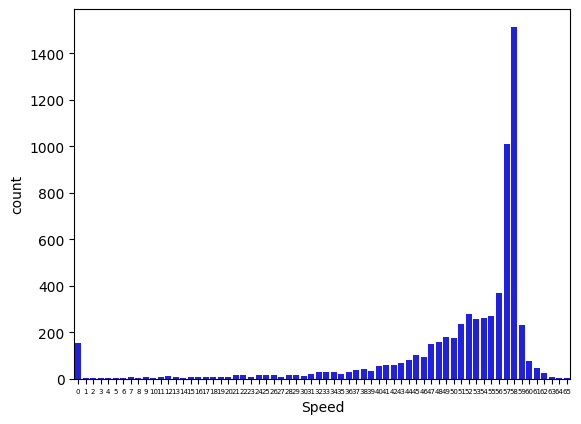

In [187]:
ax = sns.countplot(data=data, x='Speed', color='blue')
plt.xticks(fontsize=5)

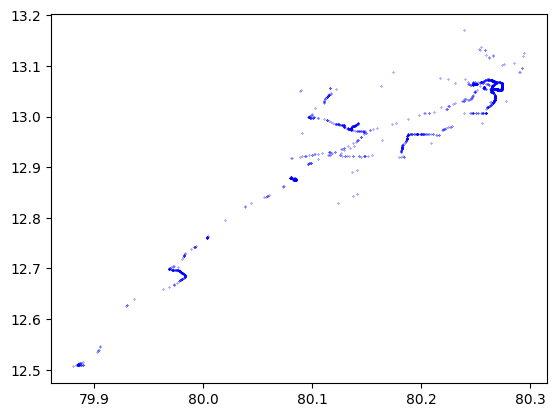

In [188]:
data = pd.read_csv(r"cas_pcw.csv")
plt.plot(data.Long, data.Lat, 'b.', ms=0.5)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  T

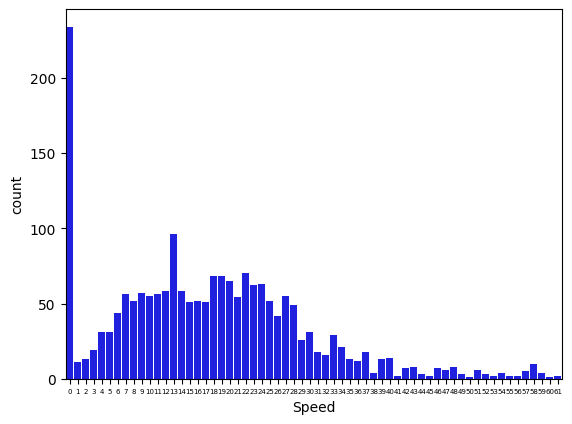

In [189]:
ax = sns.countplot(data=data, x='Speed', color='blue')
plt.xticks(fontsize=5)